# Processamento do Texto

Esse notebook as funções para fazer o pré-processamento dos textos do diários com foco em extrair uma representação textual dos textos, extração dos termos mais frequentes e análise de similaridade dos textos. 

## Imports Necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import sys, os


In [3]:
# Código para poder usar os módulos implementados nesse repositório no notebook 
path_module = os.path.abspath('../modules/')
if path_module not in sys.path:
    sys.path.append(path_module)

In [4]:
# Imports para o projeto
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocess.pre_process_text import PreProcessText
from preprocess.plot_embeddings import PlotEmbeddings

## Processamento do Texto

O código a seguir mostra um pequeno exemplo de como podemos trabalhar com os métodos de pré-processamento.

In [5]:
# Carrega o modelo de linguagem do Spacy
pp = PreProcessText("pt_core_news_lg")

In [12]:
tokens = pp.process_text("O prefeito autorizou, na tarde de ontem, a abertura de concurso público. As informações devem sair no diário oficial até quarta-feira.")

In [13]:
tokens

['artigo',
 'autorizar',
 'abertura',
 'concurso',
 'publico',
 'informacao',
 'diario',
 'oficial',
 'quarta-feira']

## Processamento do Diário Teste

In [14]:
# Lendo o diário teste
with open("gazettes/2927408_20230704_0.txt") as file_teste:
    texto_teste = file_teste.read().replace("\n", "")

In [15]:
# Pré-processando o texto
tokens_diario_teste = pp.process_text(texto_teste)

In [18]:
# Imprimindo os 100 primeiros termos
print(tokens_diario_teste[:100])

['salvador', 'terca-feira', 'oexecutivo', 'financeiro', 'simples', 'governo', 'municipal', 'fazenda', 'municipal', 'tributo', 'municipal', 'gestao', 'previdencia', 'gestor', 'organizacao', 'social', 'cogeos', 'municipal', 'Educacao', 'municipal', 'politica', 'mulher', 'infancia', 'juventude', 'municipal', 'desenvolvimento', 'urbano', 'municipal', 'mobilidade', 'municipal', 'publico', 'municipal', 'municipal', 'cultura', 'turismo', 'secult', 'gregorio', 'Mattos', 'infraestrutura', 'publico', 'seinfra', 'publico', 'salvador', 'municipal', 'gestao', 'municipal', 'Educacao', 'municipal', 'municipal', 'promocao', 'social', 'combater', 'pobreza', 'esporte', 'municipal', 'mobilidade', 'transito', 'salvador', 'Transalvador', 'municipal', 'publico', 'municipal', 'sustentabilidade', 'resiliencia', 'bem-estar', 'protecao', 'animal', 'salvador', 'codesal', 'infraestrutura', 'publico', 'seinfra', 'publico', 'salvador', 'governo', 'municipal', 'promocao', 'social', 'combater', 'pobreza', 'esporte', 

## Trabalhando com os Embeddings

In [22]:
pe = PlotEmbeddings("pt_core_news_lg")

/Users/adolfoguimaraes/anaconda3/envs/nlp/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


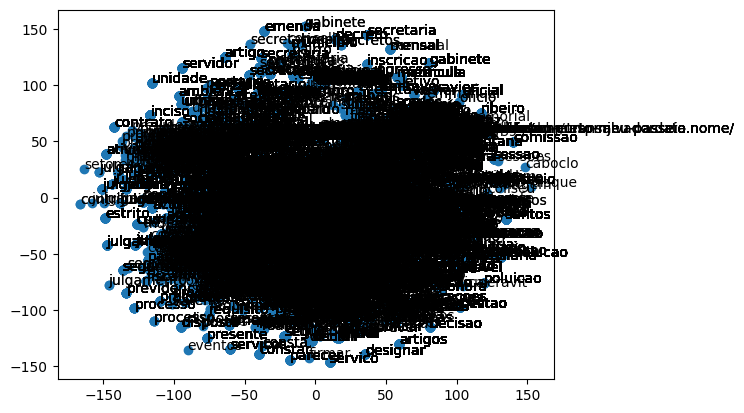

In [23]:
pe.plot_embeddings(tokens_diario_teste)

In [ ]:
# texto_teste1 = ' '.join(tokens_teste)

In [ ]:
# vetorizador = TfidfVectorizer()
# print(texto_teste1)

In [ ]:
# vetor_tfidf = vetorizador.fit_transform([texto_teste1])

In [ ]:
# indices_palavras_frequentes1 = vetor_tfidf.toarray().argsort()[0][-5:][::-1]
# palavras_frequentes1 = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes1]

In [ ]:
# print(palavras_frequentes1)

In [ ]:
texto = ' '.join(tokens_)
vetorizador = TfidfVectorizer()

In [ ]:
print(texto)

In [ ]:
vetor_tfidf = vetorizador.fit_transform([texto])

In [ ]:
#ordeno os indices do vetor tfidf e pego os 10 maiores, 0 seria a unica linha que tenho, 50 mais relevantes, -1 para inverter a ordem
indices_palavras_frequentes = vetor_tfidf.toarray().argsort()[0][-90:][::-1]
palavras_frequentes = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes]

In [ ]:
print(indices_palavras_frequentes)

In [ ]:
print(palavras_frequentes)

In [ ]:
pe.plot_embeddings(palavras_frequentes)